In [1]:
# Simple Regression Formulae:

# o/p feature = intercept + (coefficient of i/p feature * i/p feature)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [3]:
data = pd.read_csv('FuelConsumption.csv')

In [4]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [6]:
data.shape

(1067, 13)

In [7]:
len(data)

1067

In [8]:
# chossing input feature(here ENGINESIZE) and output feature(here CO2EMISSION)

data = data[['ENGINESIZE', 'CO2EMISSIONS']]

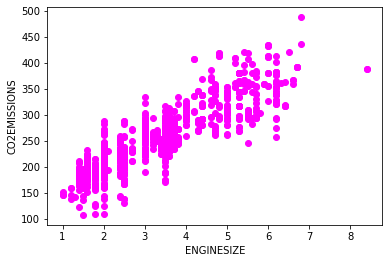

In [9]:
# Engine size vs CO2 emission

plt.scatter(data['ENGINESIZE'], data['CO2EMISSIONS'], color='magenta')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [10]:
# dividing data set into training data and test data

train = data[:(int(len(data)*0.8))]       # 80% train data
test = data[int(len(data)*0.8):]          # 20% test data

In [11]:
train

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244
...,...,...
848,3.5,251
849,3.5,271
850,2.0,214
851,3.5,244


In [12]:
test

,ENGINESIZE,CO2EMISSIONS
853,2.5,202
854,3.5,255
855,2.5,191
856,2.5,198
857,1.8,161
...,...,...
1062,3.0,271
1063,3.2,264
1064,3.0,271
1065,3.2,260


In [13]:
# Fitting model

regr = linear_model.LinearRegression()

train_x = np.array(train[['ENGINESIZE']])
train_y = np.array(train[['CO2EMISSIONS']])

regr.fit(train_x, train_y)

print("Coefficient = ", regr.coef_)        # slope
print("Intercept = ", regr.intercept_)     

Coefficient =  [[38.79512384]]
Intercept =  [127.16989951]


Text(0, 0.5, 'Emission')

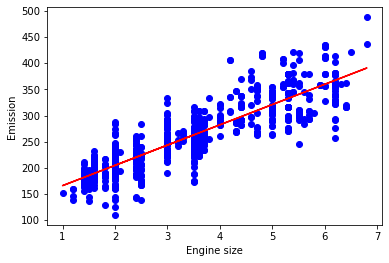

In [14]:
# Plotting regression line 

plt.scatter(train['ENGINESIZE'], train['CO2EMISSIONS'], color='blue')

plt.plot(train_x, regr.coef_*train_x + regr.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [15]:
# Function for predicting future values:

def get_regression_predictions(input_features, intercept, slope):
    predicted_values = input_features*slope + intercept
    return predicted_values

In [16]:
# Predicting emission for future car:

my_engine_size = 3.5

estimated_emission = get_regression_predictions(my_engine_size, regr.intercept_[0], regr.coef_[0][0])
print("Estimated emission = ", estimated_emission)

Estimated emission =  262.9528329350172


In [19]:
# Checking accuracy

from sklearn.metrics import r2_score

test_x = np.array(test[['ENGINESIZE']])
test_y = np.array(test[['CO2EMISSIONS']])    # Predicted value 

test_y_ = regr.predict(test_x)      # Actual value

print("Mean absolute error = %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Mean sum of squares(MSE) = %.2f" % np.mean((test_y_ - test_y) **2))
print("R2-score = %.2f" % r2_score(test_y_, test_y))
#accuracy_score(test_y_, test_y)

Mean absolute error = 20.60
Mean sum of squares(MSE) = 746.45
R2-score = 0.71


ValueError: Classification metrics can't handle a mix of continuous and multiclass targets